Dataset information
- Customers who left within the last month
- Services each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech
support, and streaming TV and movies
- Customer account information: how long as a customer, contract, payment method, paperless billing, monthly charges, total charges
and number of tickets opened in the categories administrative and technical
- Demographic info about customers – gender, age range, and if they have partners and dependents

# 1. Data cleaning

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_excel('Customer-Churn-data.xlsx')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges should be numeric dtype. Let's convert it.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

- Here, since we have 11 missing data is very low compared to total dataset (0.15%), it is safe to drop them.

In [7]:
df.dropna(inplace=True)

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

- Data is highly imbalanced with ratio = 73:27.

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; and so on.

In [9]:
#Max tenure
print(df['tenure'].max())
#72

72


In [10]:
#group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

In [11]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Remove columns not involve in processing.

In [13]:
df.drop(columns=['tenure', 'customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,1 - 12


# 2. EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2a. Churn size

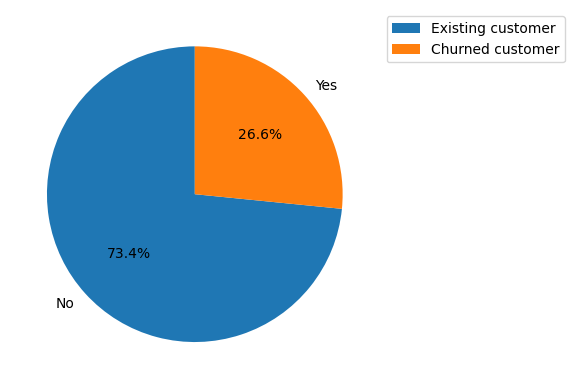

In [15]:
# Plotting the pie chart
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', startangle=90)

# Add legend at top right
legend_labels = ['Existing customer', 'Churned customer']
plt.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))


- Majority of customer stay (73.4%). Churned customers is 26.6%. 

### 2b. Characteristic of Churner

Based on customer demographic info: 'gender', 'SeniorCitizen', 'Partner', 'Dependents';

and product info include: 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group' 

to illustrate charateristic of Churner.

In [16]:
demographic = df[['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group','Churn']]
demographic

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1 - 12,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,25 - 36,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1 - 12,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),37 - 48,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1 - 12,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,13 - 24,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),61 - 72,No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1 - 12,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1 - 12,Yes


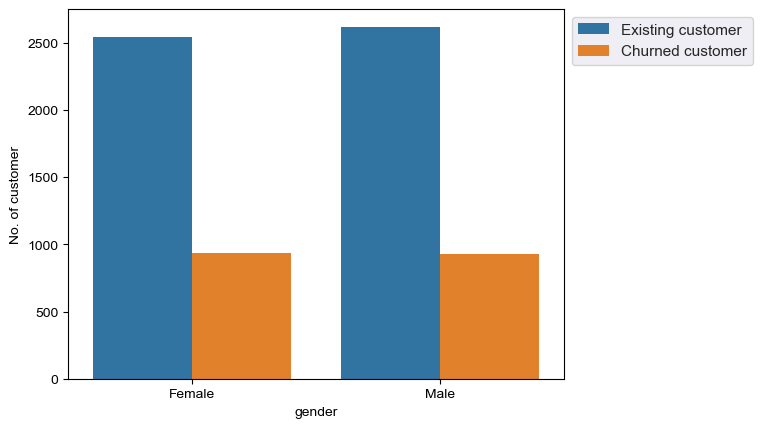

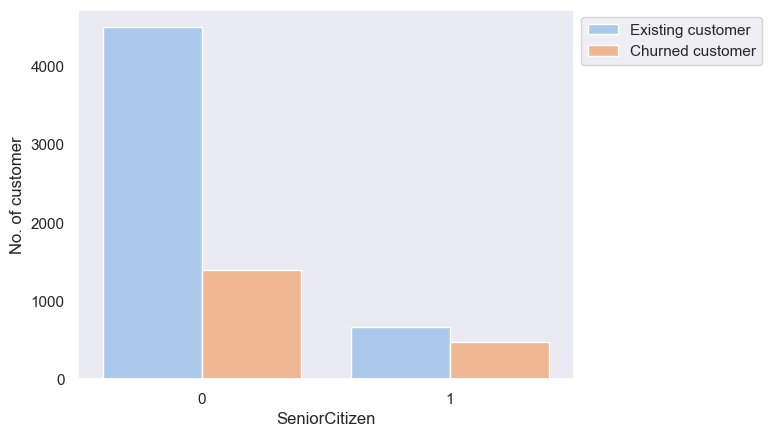

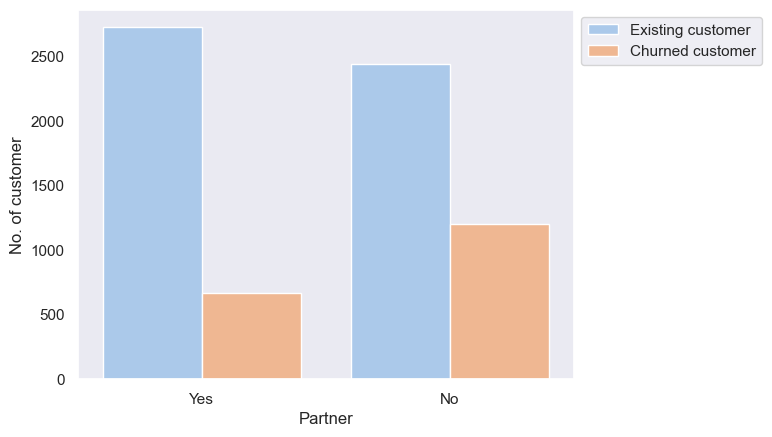

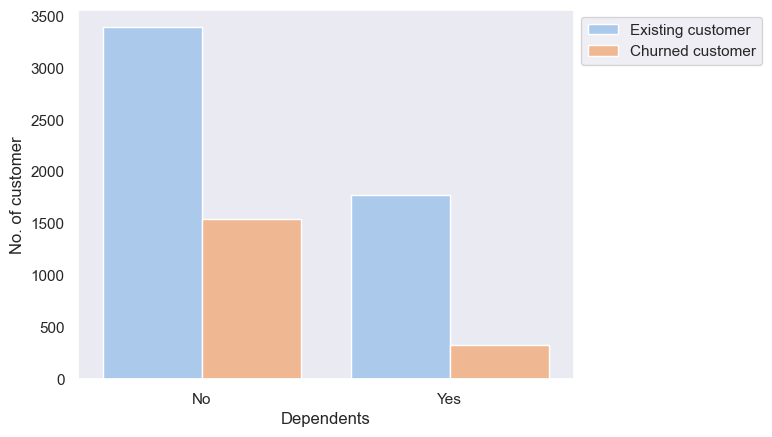

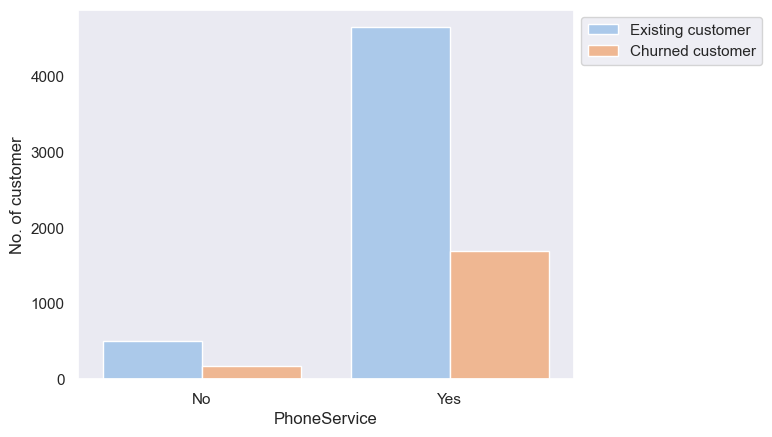

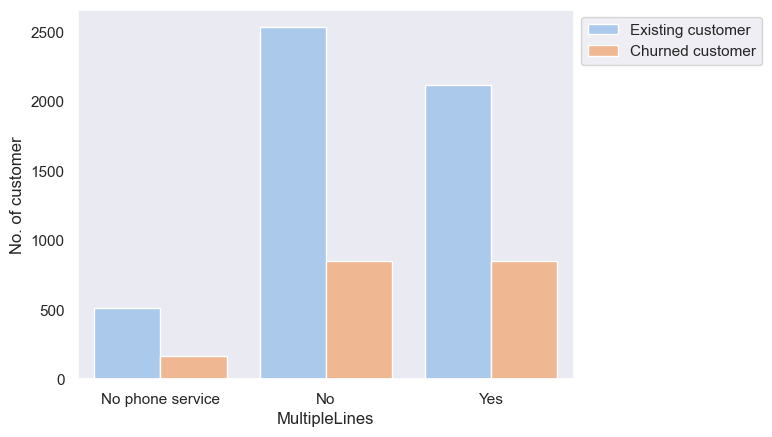

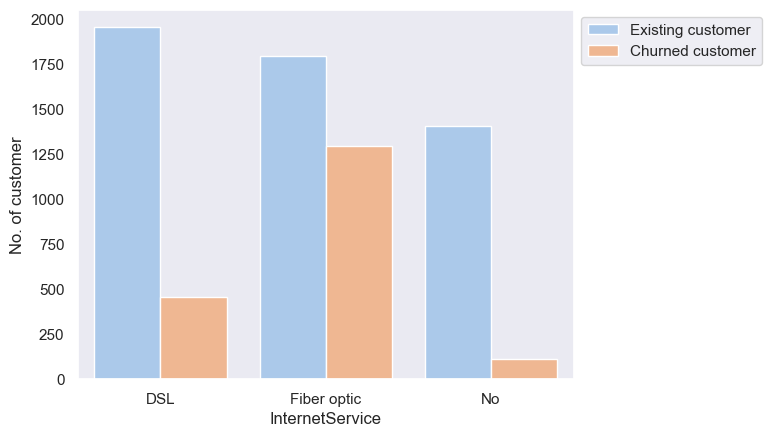

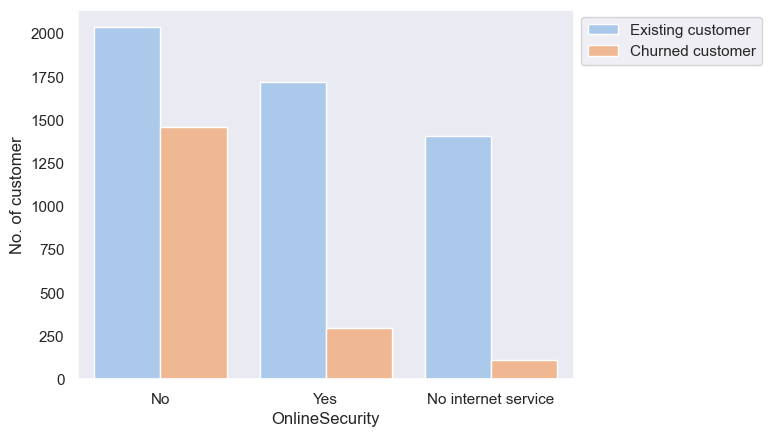

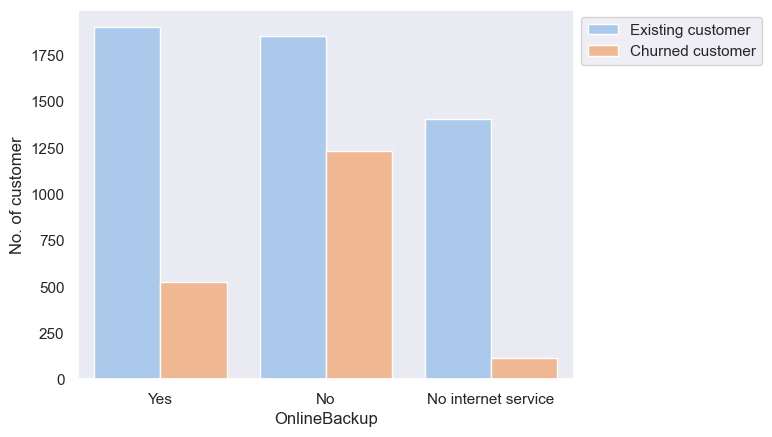

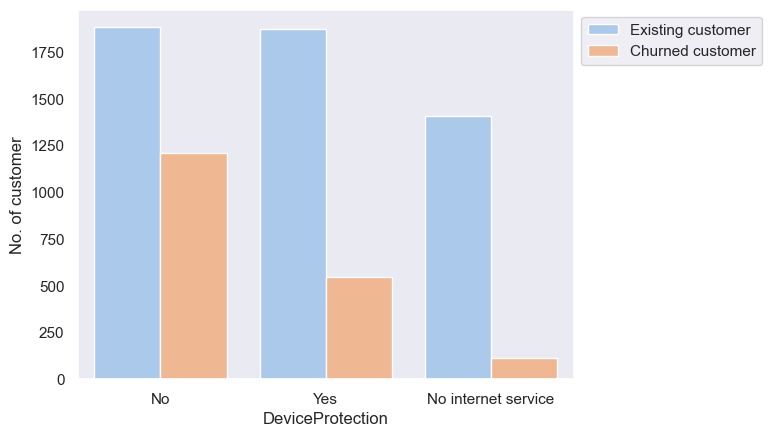

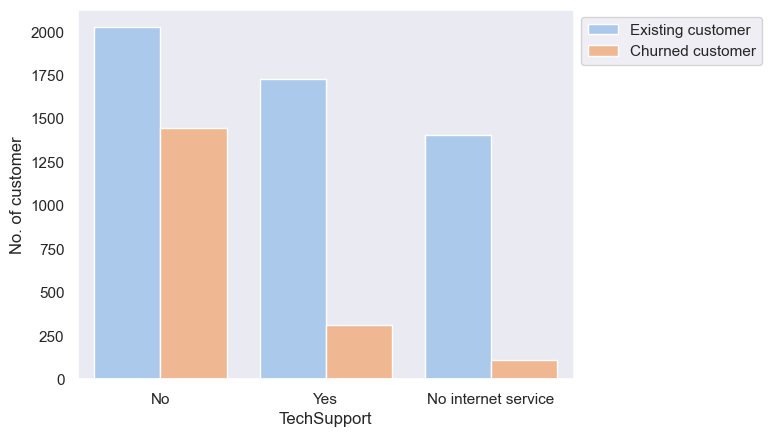

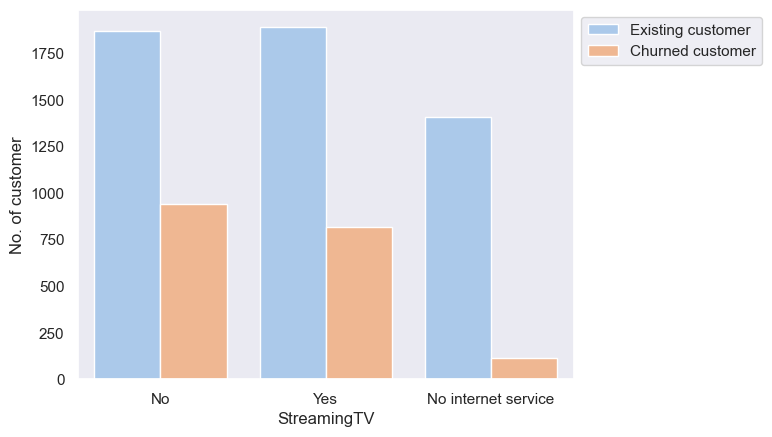

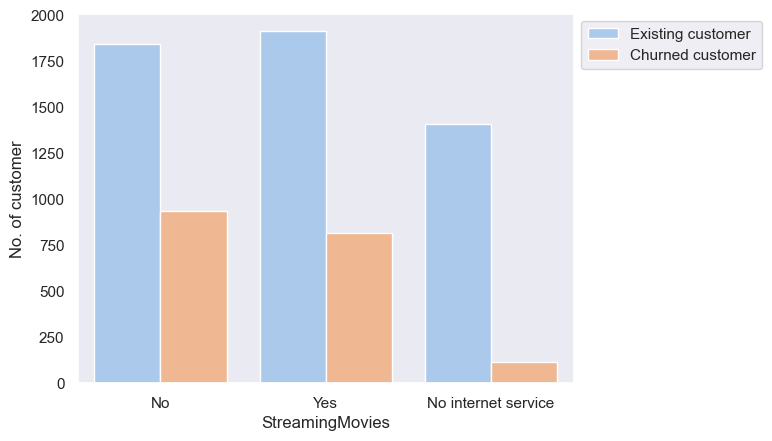

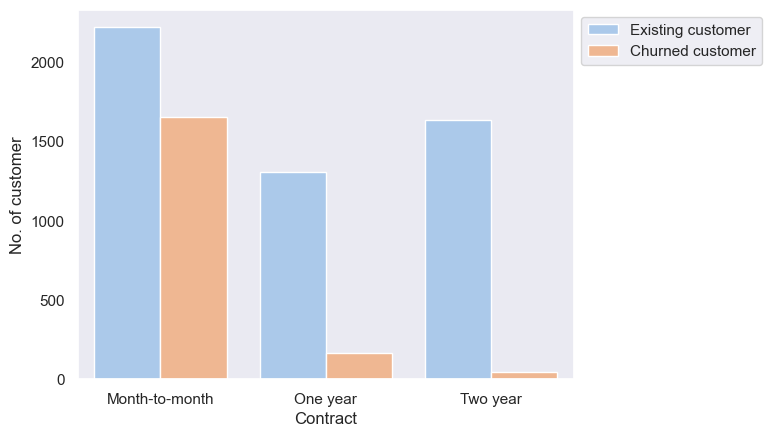

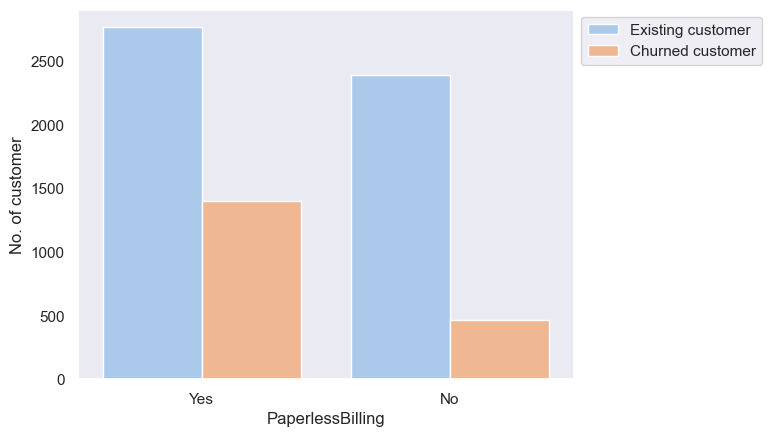

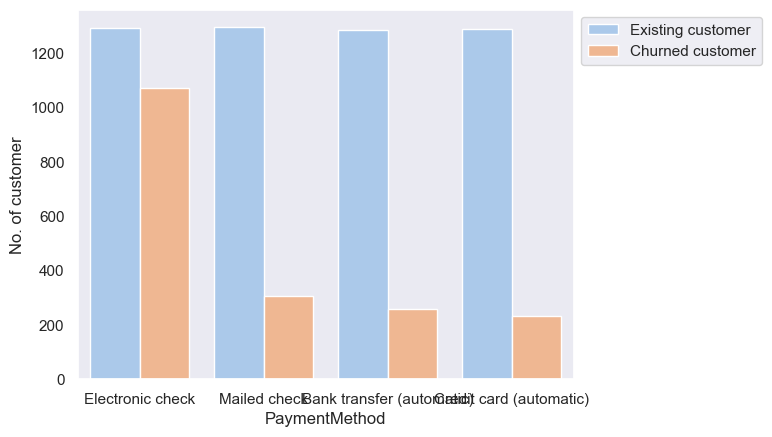

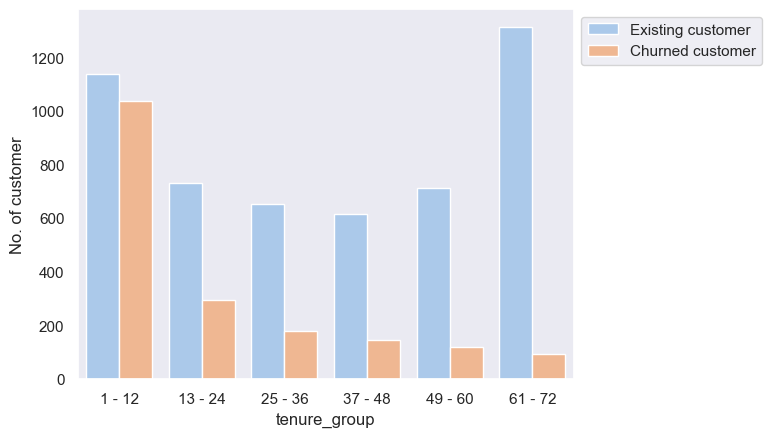

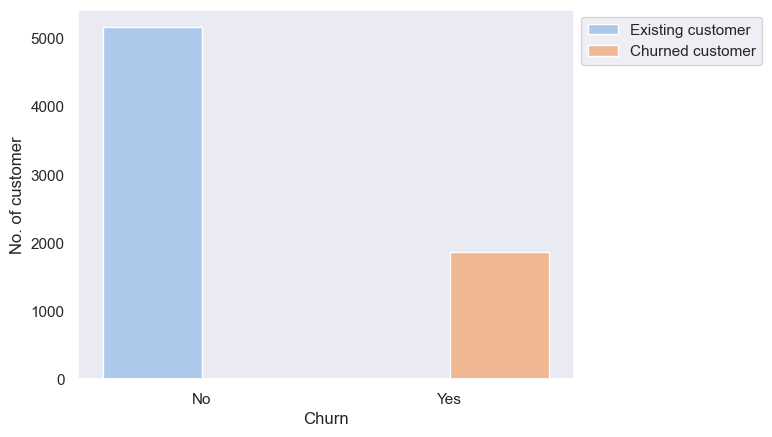

In [17]:
for i in demographic:
    plt.figure()
    sns.countplot(data=demographic, x=df[i], hue='Churn')
    sns.set_theme(style="dark", palette="pastel")
    plt.ylabel('No. of customer')
    plt.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [18]:
df['Churn'] = np.where(df['Churn'] == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1,1 - 12


In [20]:
df.to_csv('Customer_churn_cleaned.csv')

Convert all categorical variables into dummy variables.

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,3,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### 2c. Is higher charges in MonthlyCharges and TotalCharges a reason for customer to churn?

Monthly Charges distribtion by Churn customer

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_44744/2232223912.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig=sns.kdeplot(data=df_dummies, x='MonthlyCharges', shade=True, hue='Churn')


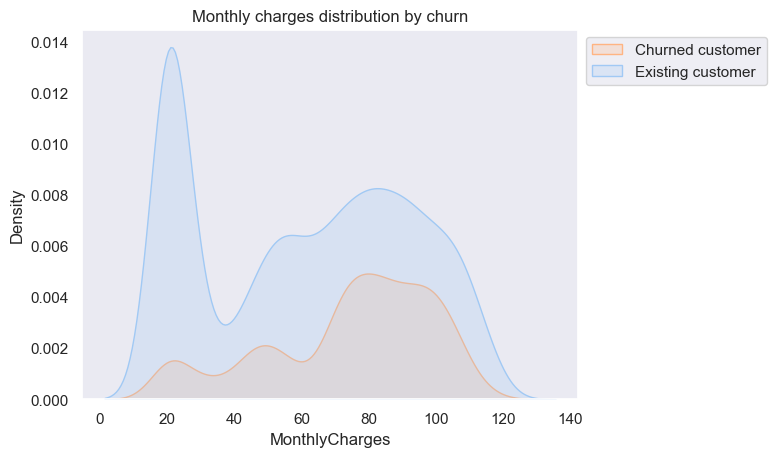

In [ ]:

sns.set_theme(style="dark", palette="pastel")
fig=sns.kdeplot(data=df_dummies, x='MonthlyCharges', shade=True, hue='Churn')
fig.set(title='Monthly charges distribution by churn')
plt.legend(labels=['Churned customer','Existing customer'], loc='upper left', bbox_to_anchor=(1, 1))

- The higher the Monthly Charges, customer tend to churn.

Total Charges distribtion by Churn customer

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_44744/1132049403.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig=sns.kdeplot(data=df_dummies, x='TotalCharges', shade=True, hue='Churn')


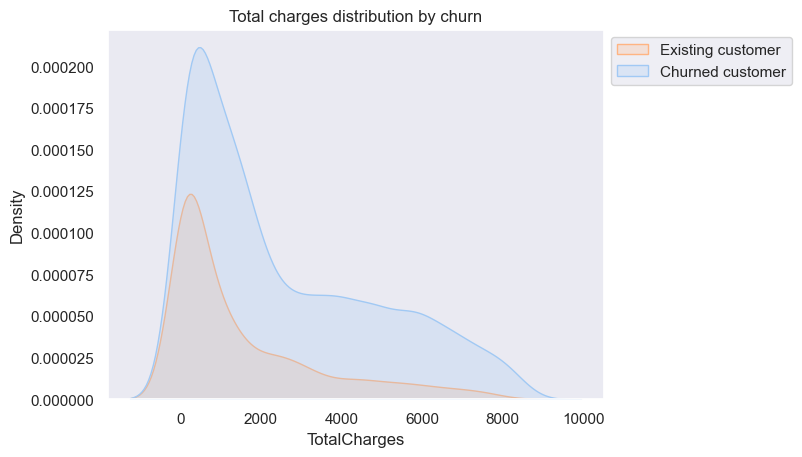

In [ ]:
sns.set_theme(style="dark", palette="pastel")
fig=sns.kdeplot(data=df_dummies, x='TotalCharges', shade=True, hue='Churn')
fig.set(title='Total charges distribution by churn')
plt.legend(labels=['Existing customer','Churned customer'], loc='upper left', bbox_to_anchor=(1, 1))

- Whereas, higher churn at lower Total Charges.

Build a correlation of all variables with Churn

<AxesSubplot: >

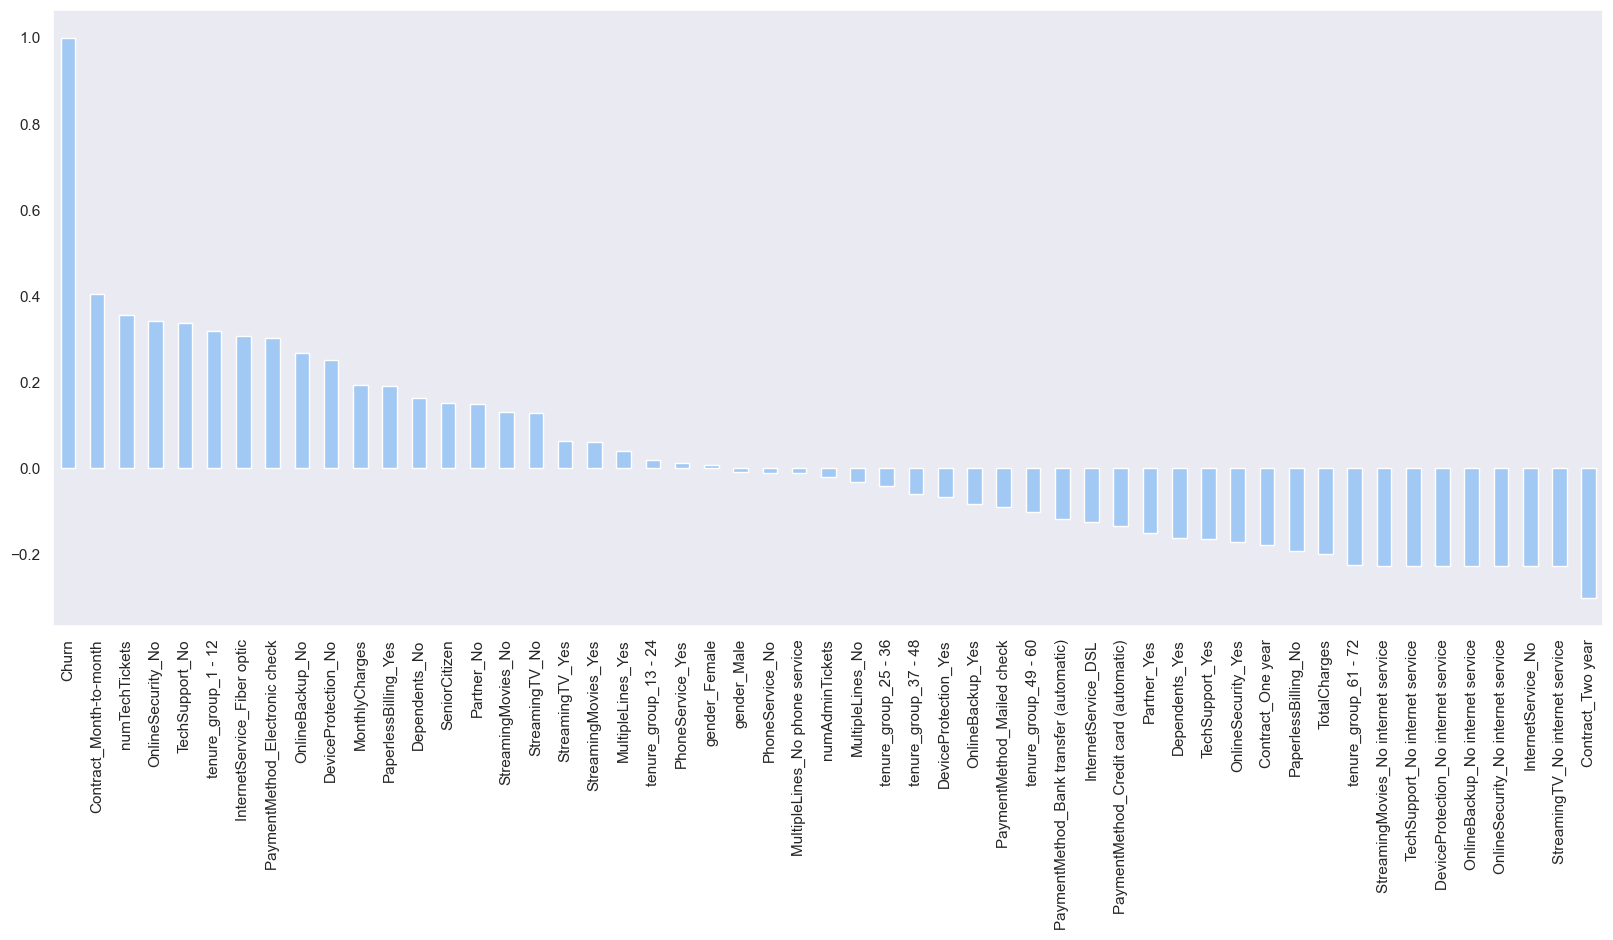

In [ ]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- HIGH Churn in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.

- Factors like gender, Availability of PhoneService and # of multiple lines have NO impact on Churn.

In [ ]:
#save manipulated dataset for upcoming prediction model and visualization step
#df_dummies.to_csv('Customer-Churn(noML).csv') 

# 3. Conclusion

1. Month to month Contract type has highest churned customer because of no contract terms and they are free to cancel the service anytime.
2. Customer without Techsupport and Device Protection tend to churn.
3. Tenure under one year or in other words, new customer tend to churn.
4. Senior citizends are not high churners.

However, going through one-by-one feature is not efficient. Thus, building prediction model is taken in this case.